# Interval Statistic
Interval statistic is library to calculate interval estimations of an average and a variance.

There are several algorithms to estimate an average:

- by known variance
- by unknown variance
- by mena absolute deviation
- by interquartile width

Load Libraries

In [1]:
using IntervalStatistic
using Distributions
using ValidatedNumerics
using Plots
pyplot(reuse=true)
srand(10)

    promote_rule(Type{ValidatedNumerics.Interval{#T<:Real}}, Type{#S<:Real}) at /Users/eoskin/.julia/v0.4/ValidatedNumerics/src/intervals/conversion.jl:9
is ambiguous with: 
    promote_rule(Type{#A<:Real}, Type{ForwardDiff.Dual{#N<:Any, #B<:Real}}) at /Users/eoskin/.julia/v0.4/ForwardDiff/src/dual.jl:149.
To fix, define 
    promote_rule(Type{ValidatedNumerics.Interval{#T<:Real}}, Type{ForwardDiff.Dual{#N<:Any, #B<:Real}})
before the new definition.
    promote_rule(Type{ValidatedNumerics.DecoratedInterval{#T<:Real}}, Type{#S<:Real}) at /Users/eoskin/.julia/v0.4/ValidatedNumerics/src/decorations/intervals.jl:76
is ambiguous with: 
    promote_rule(Type{#A<:Real}, Type{ForwardDiff.Dual{#N<:Any, #B<:Real}}) at /Users/eoskin/.julia/v0.4/ForwardDiff/src/dual.jl:149.
To fix, define 
    promote_rule(Type{ValidatedNumerics.DecoratedInterval{#T<:Real}}, Type{ForwardDiff.Dual{#N<:Any, #B<:Real}})
before the new definition.


MersenneTwister(Base.dSFMT.DSFMT_state(Int32[1007524736,1073256705,415953332,1072893275,-601364280,1073193666,-1335760268,1072926448,1521827180,1073499520  …  -439825479,1072978026,-411693740,1073111955,-1611334130,1963385220,236575170,-789052601,382,0]),[0.0,6.94301e-310,6.94301e-310,6.94301e-310,4.94066e-324,6.94301e-310,NaN,0.0,0.0,6.94301e-310  …  0.0,6.94301e-310,6.94301e-310,6.94301e-310,2.16444e-312,6.94301e-310,6.94301e-310,6.94301e-310,6.94301e-310,6.94301e-310],382,UInt32[0x0000000a])

In [2]:
to_errors = (i) -> [i.lo i.hi] - mid(i)

function show_result(value, position)
    label = value[2]
    data = value[1]
    println(label, ": ", data)
    scatter!(
        [position], (x) -> mid(data), yerror=to_errors(data), 
        label=label
    )
end

show_result (generic function with 1 method)

Generate samples of normal distribution

In [3]:
d = Normal()
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

0.07504936078705886

[Plots.jl] Initializing backend: pyplot
known variance: [-0.120948, 0.271046]
inter quartile width: [-0.144696, 0.109761]
unknown variance: [-0.0959839, 0.246083]
standard error: [-0.0115818, 0.161681]



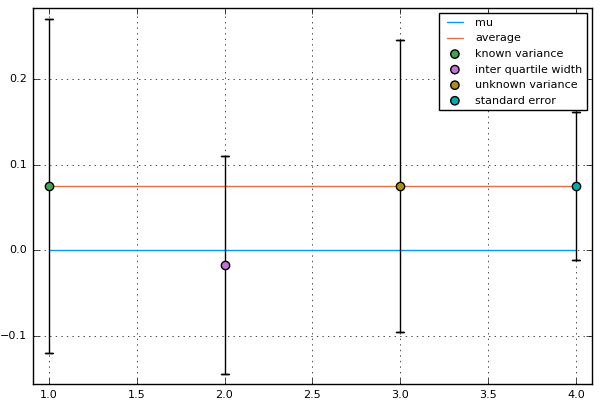

In [4]:
result_by_known_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byKnownVariance(
        confidence_probability, sigma^2
    )),
    "known variance"
]

result_by_inter_quartile_width = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byInterQuartileWidth(
        confidence_probability
    )),
    "inter quartile width"
]

result_by_standard_errror = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byStandardError()),
    "standard error"
]

result_by_unknown_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byUnknownVariance(
        confidence_probability
    )),
    "unknown variance"
]


plot([1.0;2.0;4.0], (x) -> mu, label="mu")
plot!([1.0;2.0;4.0], (x) -> average, label="average")

show_result(result_by_known_variance, 1)
show_result(result_by_inter_quartile_width, 2)
show_result(result_by_unknown_variance, 3)
show_result(result_by_standard_errror, 4)

Generate samples of normal distribution with mu=100 sigma=4

In [5]:
d = Normal(100, 4)
length = 100
confidence_probability = 0.95
values = rand(d, length)
mu, sigma = params(d)
average = reduce(+, values) / length

99.73470493027047

known variance: [98.9507, 100.519]
inter quartile width: [99.3988, 100.533]
unknown variance: [99.004, 100.466]
standard error: [99.3646, 100.105]



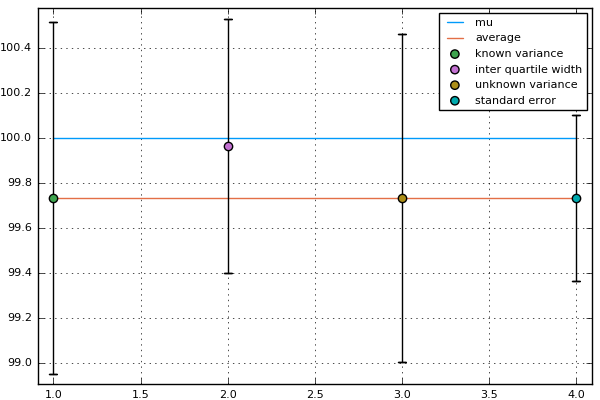

In [6]:
result_by_known_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byKnownVariance(
        confidence_probability, sigma^2
    )),
    "known variance"
]

result_by_inter_quartile_width = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byInterQuartileWidth(
        confidence_probability
    )),
    "inter quartile width"
]

result_by_standard_errror = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byStandardError()),
    "standard error"
]

result_by_unknown_variance = [
    IntervalStatistic.mean(values, IntervalStatistic.Mean.byUnknownVariance(
        confidence_probability
    )),
    "unknown variance"
]


plot([1.0;2.0;4.0], (x) -> mu, label="mu")
plot!([1.0;2.0;4.0], (x) -> average, label="average")

show_result(result_by_known_variance, 1)
show_result(result_by_inter_quartile_width, 2)
show_result(result_by_unknown_variance, 3)
show_result(result_by_standard_errror, 4)